In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
"""
Considering data from CDC to analze whether there is there a relation between SVI, vaccination hesitancy, and actual vaccination rates?

Data from CDC: https://data.cdc.gov/Vaccinations/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/q9mh-h2tw/about_data
"""

df = pd.read_csv("../data/vaccination.csv")


In [16]:
df.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,1119,"Sumter County, Alabama",ALABAMA,0.1808,0.2526,0.1390,0.96,Very High Vulnerability,0.96,Very High Concern,...,0.0053,0.0007,0.0214,0.7192,0.0000,0.2481,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.369055 32.742584, -88.3685...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


In [17]:
df.describe()

,FIPS Code,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
count,3142.000000,3142.000000,3142.000000,3142.000000,3141.000000,3142.000000,2864.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,30383.649268,0.132600,0.191429,0.086653,0.500000,0.499965,0.399398,0.094184,0.018463,0.013621,0.089259,0.000919,0.762499
std,15162.508374,0.046337,0.053494,0.032938,0.288842,0.288832,0.142893,0.138647,0.076340,0.027665,0.144283,0.006240,0.202157
min,1001.000000,0.026900,0.049900,0.018600,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006900
25%,18177.500000,0.098300,0.148500,0.062325,0.250000,0.250000,0.318000,0.022200,0.001200,0.002800,0.006500,0.000000,0.644450
50%,29176.000000,0.131800,0.190100,0.084900,0.500000,0.500000,0.400000,0.042300,0.002800,0.006100,0.021900,0.000100,0.837400
75%,45080.500000,0.161725,0.228800,0.104475,0.750000,0.750000,0.494000,0.096800,0.006900,0.012800,0.098400,0.000600,0.924875
max,56045.000000,0.267000,0.323300,0.182400,1.000000,1.000000,0.999000,0.991700,0.919000,0.417300,0.872300,0.272700,1.000000


<Axes: >

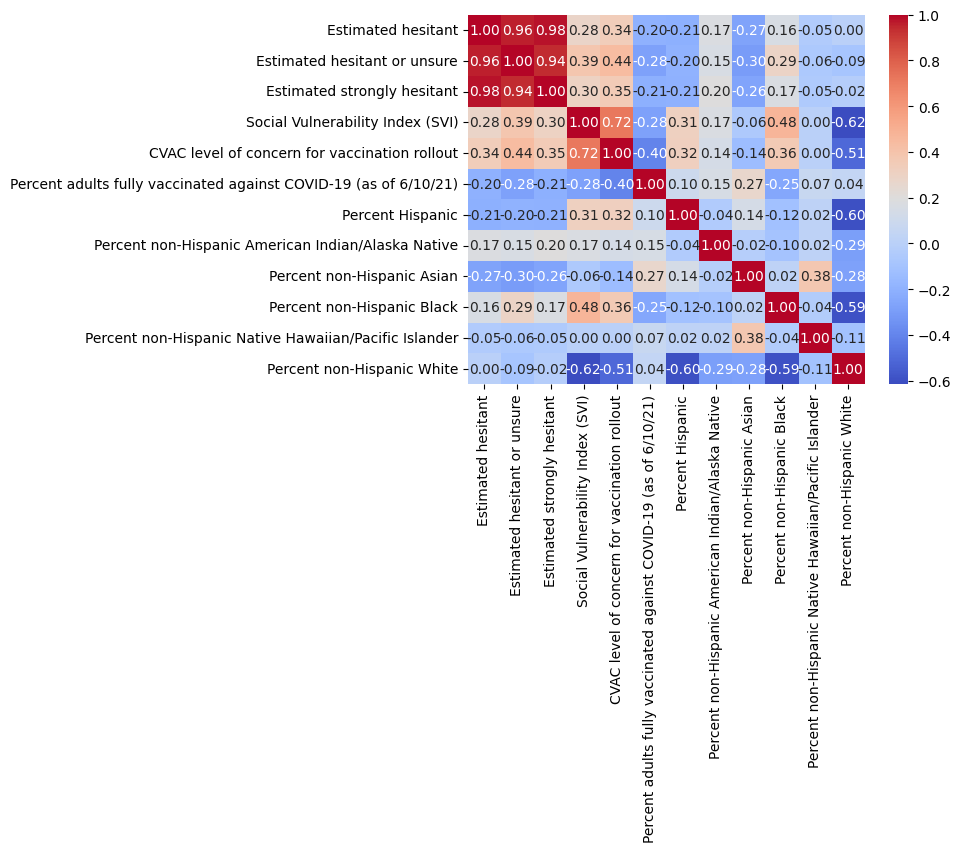

In [24]:
numerical = df[[
    'Estimated hesitant',
    'Estimated hesitant or unsure', 
    'Estimated strongly hesitant',
    'Social Vulnerability Index (SVI)',
    'CVAC level of concern for vaccination rollout',
    'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)',
    'Percent Hispanic',
    'Percent non-Hispanic American Indian/Alaska Native',
    'Percent non-Hispanic Asian', 
    'Percent non-Hispanic Black',
    'Percent non-Hispanic Native Hawaiian/Pacific Islander',
    'Percent non-Hispanic White'
    ]]


correlation_matrix = numerical.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


<Axes: xlabel='Social Vulnerability Index (SVI)', ylabel='CVAC level of concern for vaccination rollout'>

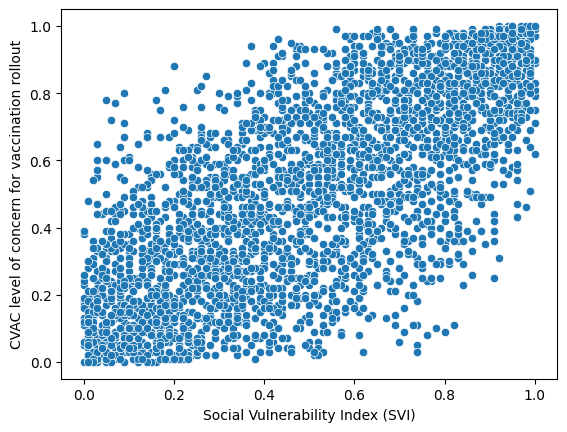

In [30]:
sns.scatterplot(df, x="Social Vulnerability Index (SVI)", y='CVAC level of concern for vaccination rollout')

In [34]:
# Test for significant relation between SVI and CVAC concern

contingency_table = pd.crosstab(df['SVI Category'].dropna(), df['CVAC Level Of Concern'].dropna())
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

chi2_stat, p_val # significant relationship!

(np.float64(1852.711940317462), np.float64(0.0))

In [38]:
# relationship between vaccination rates and SVI? (analysis of variance -- ANOVA)

anova_data = df[['Percent adults fully vaccinated against COVID-19 (as of 6/10/21)', 'SVI Category']].dropna()
grouped_anova = [anova_data[anova_data['SVI Category'] == cat]['Percent adults fully vaccinated against COVID-19 (as of 6/10/21)']
                 for cat in anova_data['SVI Category'].unique()]
anova_result = f_oneway(*grouped_anova)

anova_result # significant result! p value very small

F_onewayResult(statistic=np.float64(59.39610007451037), pvalue=np.float64(3.060004692023319e-48))

In [40]:
# There is variance in vaccination rates based on SVI category. To see how the categories compare to each other, run Tukey HSD 

anova_data = df[['Percent adults fully vaccinated against COVID-19 (as of 6/10/21)', 'SVI Category']].dropna()

tukey = pairwise_tukeyhsd(endog=anova_data['Percent adults fully vaccinated against COVID-19 (as of 6/10/21)'],
                          groups=anova_data['SVI Category'],
                          alpha=0.05)

tukey_result = tukey.summary()
tukey_result

group1,group2,meandiff,p-adj,lower,upper,reject
High Vulnerability,Low Vulnerability,0.0522,0.0,0.03,0.0743,True
High Vulnerability,Moderate Vulnerability,0.0266,0.0107,0.0042,0.0491,True
High Vulnerability,Very High Vulnerability,-0.0364,0.0001,-0.0592,-0.0135,True
High Vulnerability,Very Low Vulnerability,0.0775,0.0,0.0555,0.0996,True
Low Vulnerability,Moderate Vulnerability,-0.0255,0.0131,-0.0475,-0.0036,True
Low Vulnerability,Very High Vulnerability,-0.0885,0.0,-0.1109,-0.0662,True
Low Vulnerability,Very Low Vulnerability,0.0254,0.0114,0.0039,0.0469,True
Moderate Vulnerability,Very High Vulnerability,-0.063,0.0,-0.0856,-0.0404,True
Moderate Vulnerability,Very Low Vulnerability,0.0509,0.0,0.0291,0.0727,True
Very High Vulnerability,Very Low Vulnerability,0.1139,0.0,0.0917,0.1361,True


In [ ]:
"""
largest variance in vaccination rates is between very low SVI and very high SVI. 
p-values across the board indicate significant differences between groups

can we model vaccination rates based on SVI/CVAC and hesitancy?
"""

In [44]:
# First can see if relation between SVI and hesitancy. Include demographic data as well

multi_var_data = df[['Social Vulnerability Index (SVI)', 'Estimated hesitant', 
                       'Percent Hispanic', 'Percent non-Hispanic Asian', 
                       'Percent non-Hispanic Black', 'Percent non-Hispanic White']].dropna()

# Define independent variables (SVI and racial demographic percentages)
X_multi = multi_var_data[['Social Vulnerability Index (SVI)', 'Percent Hispanic',
                          'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 
                          'Percent non-Hispanic White']]
y_multi = multi_var_data['Estimated hesitant']  # Dependent variable (Hesitancy)


X_multi = sm.add_constant(X_multi)

# Perform the multiple linear regression
multi_model = sm.OLS(y_multi, X_multi)
multi_results = multi_model.fit()

# Display the summary of the regression results
multi_results_summary = multi_results.summary()
multi_results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Estimated hesitant   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     189.6
Date:                Thu, 15 Aug 2024   Prob (F-statistic):          6.68e-177
Time:                        15:31:59   Log-Likelihood:                 5607.9
No. Observations:                3141   AIC:                        -1.120e+04
Df Residuals:                    3135   BIC:                        -1.117e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.1754      0.009     18.556      0.000       0.157       0.194
Social Vulnerability Index (SVI)     0.0571      0.003     16.941      0.000       0.051       0.064
Percent Hispanic                    -0.1556      0.010    -15.589      0.000      -0.175      -0.136
Percent non-Hispanic Asian          -0.4223      0.030    -14.051      0.000      -0.481      -0.363
Percent non-Hispanic Black          -0.0679      0.010     -7.007      0.000      -0.087      -0.049
Percent non-Hispanic White          -0.0588      0.009     -6.269      0.000      -0.077      -0.040
==============================================================================
Omnibus:                      170.816   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.387
Skew:                           0.478   Prob(JB):                     4.26e-55
Kurtosis:                       4.000   Cond. No.                         58.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# this indicates that approximately 23.2% of the variance in estimated hesitancy can be influenced by SVI and demographics
# Percent asian population has a larger negative affect on hesitancy, possibly implying asians are less likely to be hesitant about vaccines

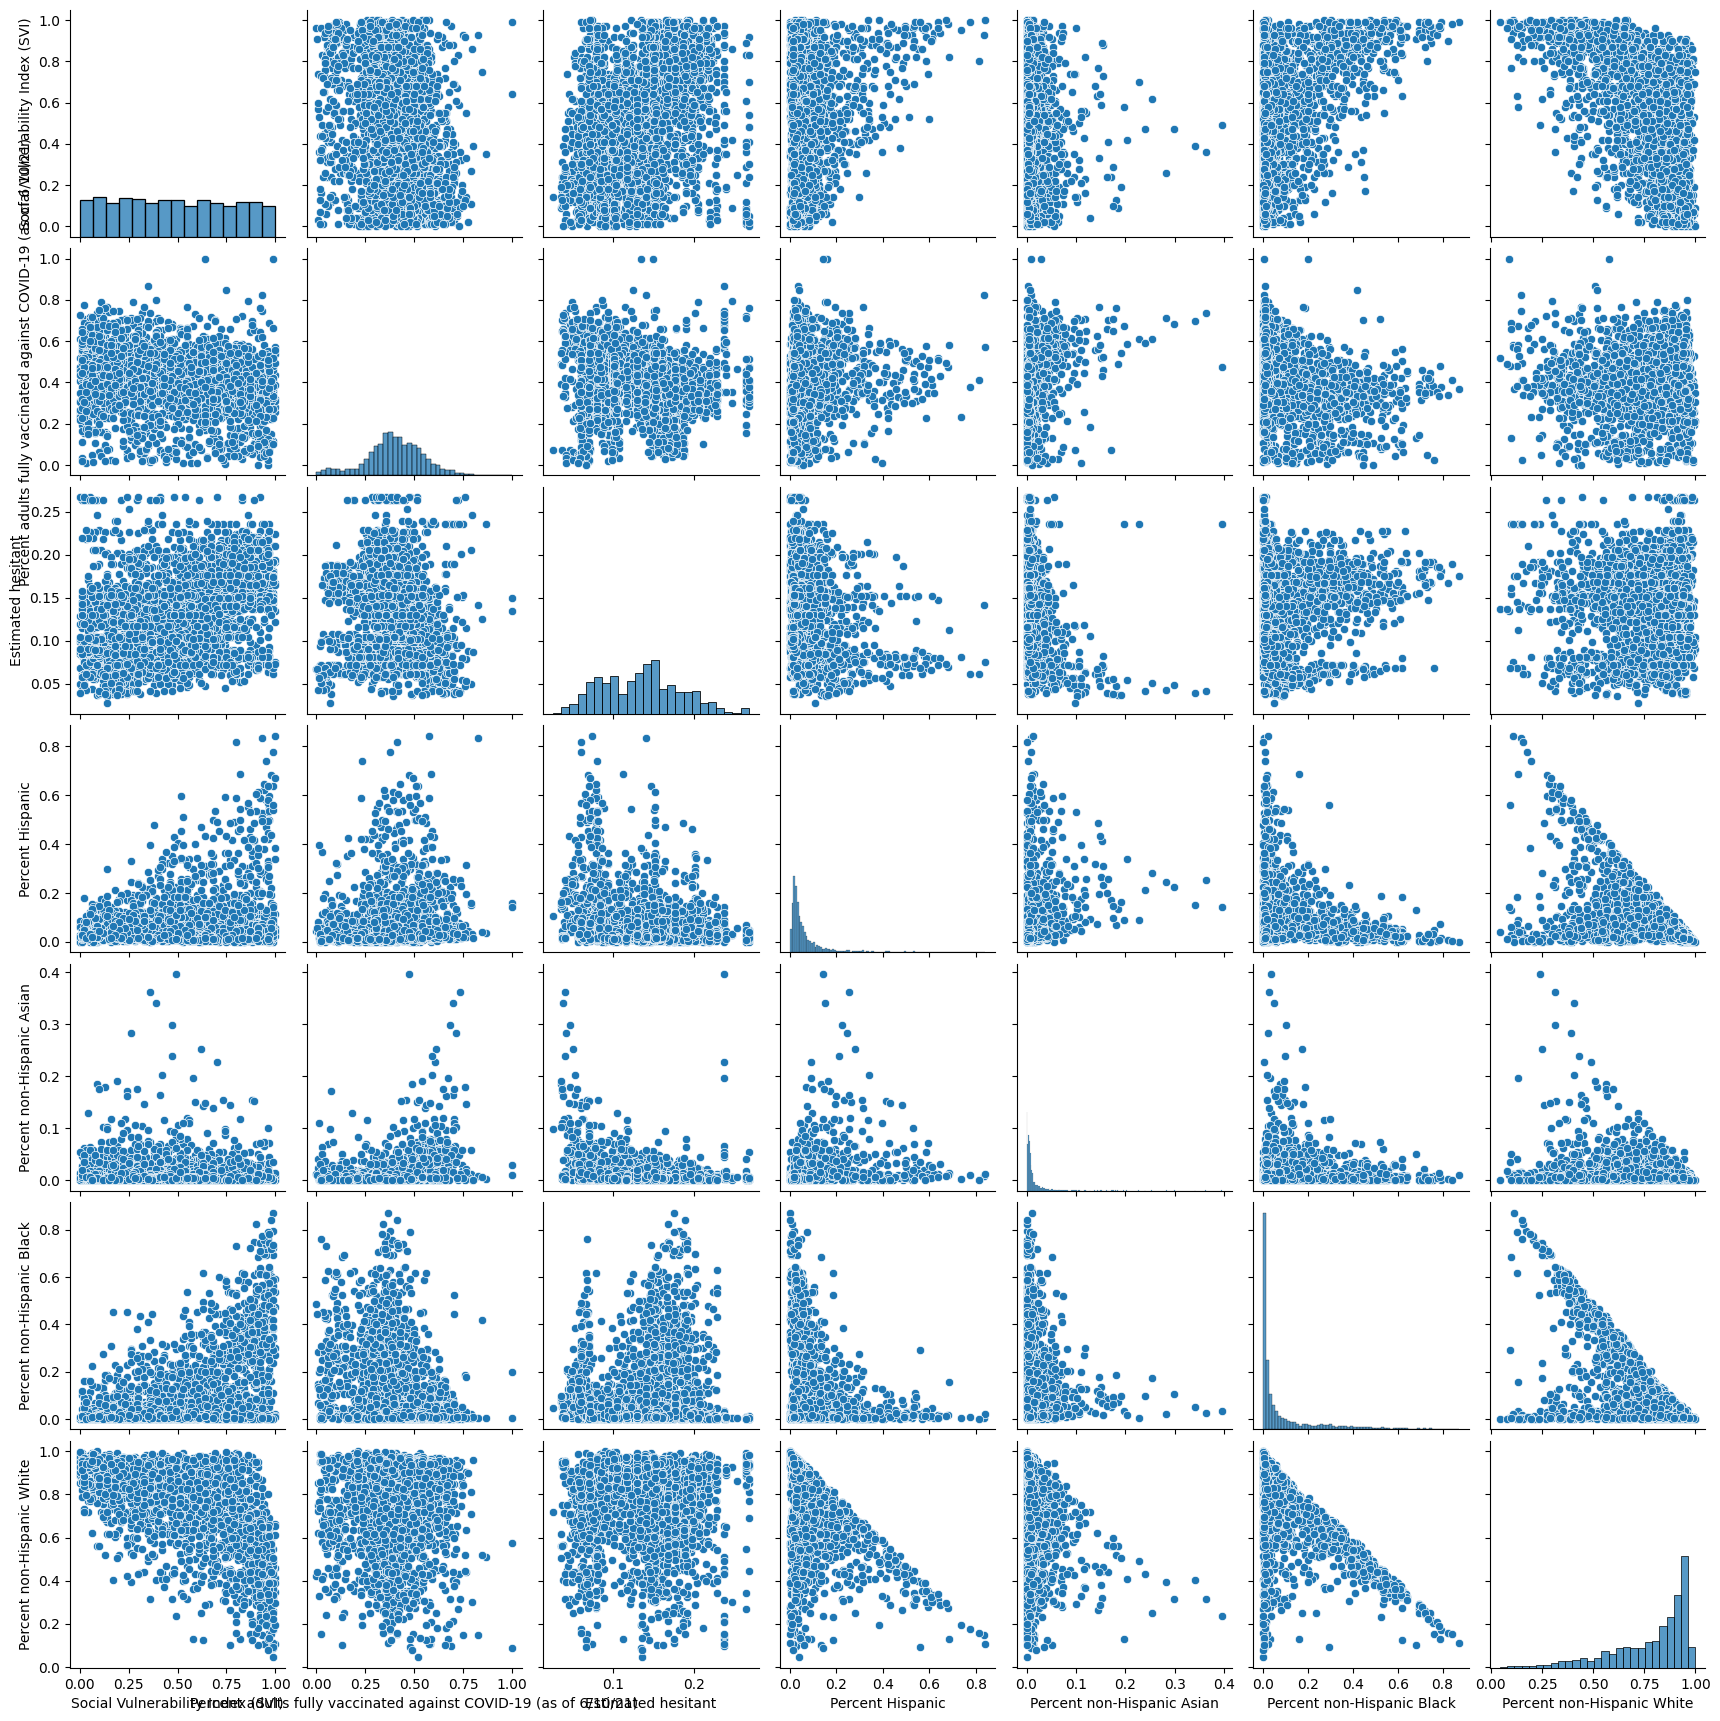

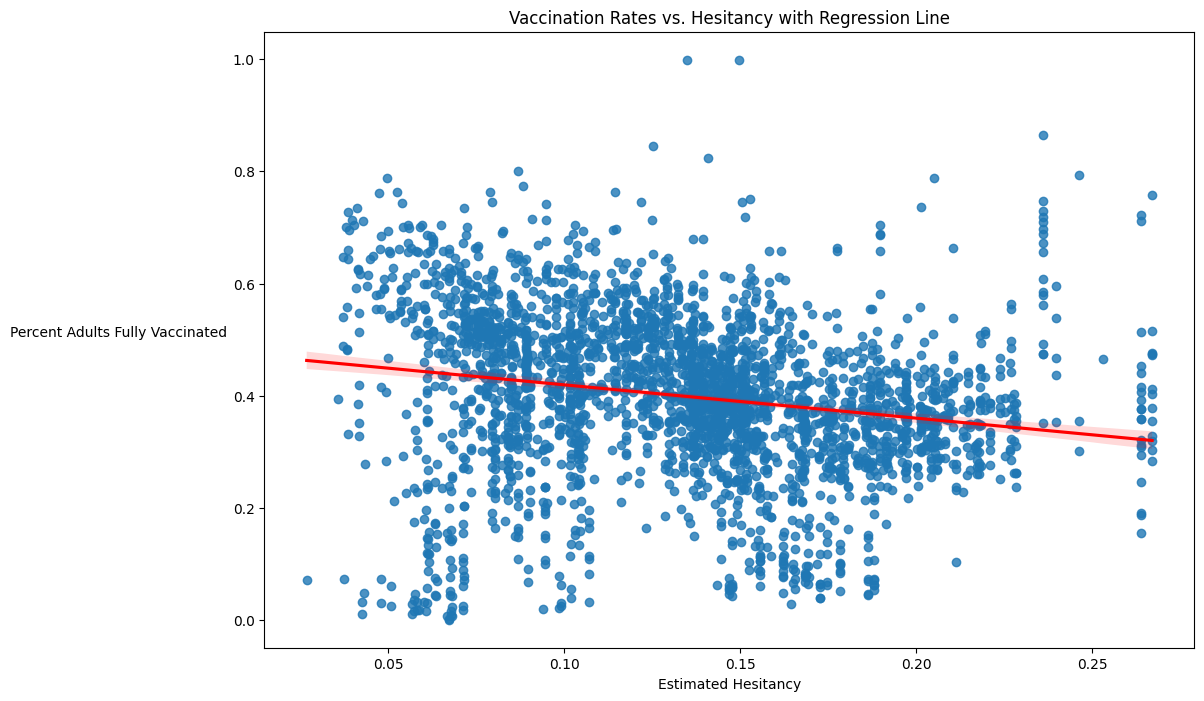

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                   OLS Regression Results                                                   
============================================================================================================================
Dep. Variable:     Percent adults fully vaccinated against COVID-19 (as of 6/10/21)   R-squared:                       0.202
Model:                                                                          OLS   Adj. R-squared:                  0.201
Method:                                                               Least Squares   F-statistic:                     120.9
Date:                                                              Thu, 15 Aug 2024   Prob (F-statistic):          2.02e-136
Time:                                                                      15:54:05   Log-Likelihood:                 1832.6
No. Observations:                                                              2863   AIC:                            -3651.
Df Residuals:                                                                  2856   BIC:                            -3610.
Df Model:                                                                         6                                         
Covariance Type:                                                          nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.8009      0.032     24.824      0.000       0.738       0.864
Social Vulnerability Index (SVI)    -0.1334      0.012    -11.487      0.000      -0.156      -0.111
Estimated hesitant                  -0.1746      0.057     -3.055      0.002      -0.287      -0.063
Percent Hispanic                    -0.2160      0.039     -5.495      0.000      -0.293      -0.139
Percent non-Hispanic Asian           0.8156      0.109      7.494      0.000       0.602       1.029
Percent non-Hispanic Black          -0.4232      0.032    -13.371      0.000      -0.485      -0.361
Percent non-Hispanic White          -0.3454      0.031    -11.260      0.000      -0.406      -0.285
==============================================================================
Omnibus:                      227.540   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.276
Skew:                          -0.609   Prob(JB):                     2.62e-78
Kurtosis:                       4.230   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Prepare the data for modeling vaccination rates including hesitancy
full_data = df[['Social Vulnerability Index (SVI)', 
                  'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)',
                  'Estimated hesitant', 'Percent Hispanic', 
                  'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 
                  'Percent non-Hispanic White']].dropna()

# Define the dependent variable (Vaccination rates) and independent variables (SVI, demographics, hesitancy)
X_full = full_data[['Social Vulnerability Index (SVI)', 'Estimated hesitant',
                    'Percent Hispanic', 'Percent non-Hispanic Asian', 
                    'Percent non-Hispanic Black', 'Percent non-Hispanic White']]
y_full = full_data['Percent adults fully vaccinated against COVID-19 (as of 6/10/21)']

# Add a constant to the independent variables
X_full = sm.add_constant(X_full)

# Perform the multiple linear regression
full_model = sm.OLS(y_full, X_full)
full_results = full_model.fit()

# Generate the regression summary
full_results_summary = full_results.summary()

# Visualizations: Pairplot and regression plot
# Pairplot to visualize relationships between variables
sns.pairplot(full_data)

# Regression plot: Vaccination rates vs Hesitancy
plt.figure(figsize=(12, 8))
sns.regplot(x='Estimated hesitant', y='Percent adults fully vaccinated against COVID-19 (as of 6/10/21)', 
            data=full_data, line_kws={"color": "red"})
plt.title("Vaccination Rates vs. Hesitancy with Regression Line")
plt.xlabel("Estimated Hesitancy")
plt.ylabel("Percent Adults Fully Vaccinated")

plt.show()

# Display the regression summary
full_results_summary